In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from torchvision import datasets, transforms

In [3]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, X1):
        Z1 = self.linear1(X1)
        X2 = F.relu(Z1)
        Z2 = self.linear2(X2)
        Y = F.softmax(Z2, dim=-1)
        return Y

In [4]:
hidden_size=200
lr=0.01
batch_size=32
n_epoch=100

In [5]:
model = NeuralNet(input_size=784, hidden_size=hidden_size, output_size=10)
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss() # クロスエントロピー
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(784))
])

In [6]:
dataloader_train = torch.utils.data.DataLoader(
    datasets.MNIST('./data/mnist', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)
dataloader_test = torch.utils.data.DataLoader(
    datasets.MNIST('./data/mnist', train=False, download=True, transform=transform),
    shuffle=False
)

This Is Debug Mode. Show Sample Image...

DATA No.0 is 5


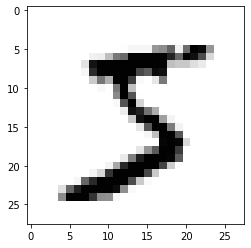

In [7]:
data_train_0 = dataloader_train.dataset[0]
x_train_0 = data_train_0[0].numpy().reshape(28, 28)
t_train_0 = data_train_0[1]
print("This Is Debug Mode. Show Sample Image...\n")
print("DATA No.0 is {}".format(t_train_0))
plt.imshow(x_train_0, cmap=cm.Greys)
plt.show();

In [ ]:
loss_train_list = []
loss_test_list = []
acc_test_list = []

for epoch in range(1, n_epoch+1):
    loss_train_batch_list = []
    loss_test_batch_list = []
    correct = 0
    total = 0

    model.train()

    for x_train_batch, t_train_batch in dataloader_train:
        model.zero_grad() # 勾配の初期化
        y_train_batch = model.forward(x_train_batch)
        loss_train_batch = criterion(y_train_batch, t_train_batch)
        loss_train_batch.backward()
        optimizer.step()
        loss_train_batch_list.append(loss_train_batch.tolist())

    # ----- TEST -----
    model.eval()
    # ----- batch_sizeごとに処理 -----
    for x_test_batch, t_test_batch in dataloader_test:
        y_test_batch = model.forward(x_test_batch)
        loss_test_batch = criterion(y_test_batch, t_test_batch)
        loss_test_batch_list.append(loss_test_batch.tolist())

        label_test_batch = y_test_batch.argmax(1).numpy()
        t_test_batch = t_test_batch.numpy()
        correct += np.sum((label_test_batch - t_test_batch) == 0)
        total += 1

    loss_train_list.append(np.mean(loss_train_batch_list))
    loss_test_list.append(np.mean(loss_test_batch_list))
    acc_test_batch = 100 * correct / total
    acc_test_list.append(acc_test_batch)

    print('EPOCH: {}, TRAIN LOSS: {:.3f}, TEST LOSS: {:.3f}, TEST ACC: {:.3f}'.format(
        epoch,
        np.mean(loss_train_list),
        np.mean(loss_test_list),
        acc_test_batch
    ))


EPOCH: 1, TRAIN LOSS: 2.255, TEST LOSS: 2.131, TEST ACC: 53.730
EPOCH: 2, TRAIN LOSS: 2.105, TEST LOSS: 1.992, TEST ACC: 65.710
EPOCH: 3, TRAIN LOSS: 2.007, TEST LOSS: 1.913, TEST ACC: 76.610
EPOCH: 4, TRAIN LOSS: 1.934, TEST LOSS: 1.855, TEST ACC: 82.560
EPOCH: 5, TRAIN LOSS: 1.883, TEST LOSS: 1.816, TEST ACC: 83.300
EPOCH: 6, TRAIN LOSS: 1.846, TEST LOSS: 1.788, TEST ACC: 83.760


In [ ]:
plt.plot(loss_train_list)
plt.show()
plt.plot(loss_test_list)
plt.show()
plt.plot(acc_test_list)
plt.show()